In [1]:
import numpy as np
import pandas as pd

In [11]:
class KMeans:
    """聚类算法"""
    
    def __init__(self, k, times):
        """初始化方法
        
        Parameters
        ——————
        k：int
            聚类个数
        
        times:int
            聚类迭代的次数
        """
        self.k = k
        self.times = times
        
    def fit(self, X):
        """模型训练。
        
        Parameters
        ——————
        X：待训练样本属性
        """
        X = np.asarray(X)
        # 设置随机种子
        np.random.seed(0)
        # 从数组中随机选择k个点作为初始聚类中心
        self.cluster_centers_ = X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))
        
        for t in range(self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离
                dis = np.sqrt(np.sum((x - self.cluster_centers_)**2, axis=1))
                # 将最小距离的索引赋值给标签数组
                self.labels_[index] = dis.argmin()
            # 遍历每一个族
            for i in range(self.k):
                # 计算每个族内所有点的均值，更新聚类中心
                self.cluster_centers_[i] = np.mean(X[self.labels_ == i], axis=0)
                
    def predict(self, X):
        """ 对样本数据进行预测
        
        """
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            # 计算样本到每个聚类中心的距离
            dis = np.sqrt(np.sum((x - self.cluster_centers_)**2, axis=1))
            # 找到最近的聚类中心，划分类别
            result[index] = dis.argmin()
        return result

In [2]:
data = pd.read_csv("order.csv")

In [5]:
t = data.iloc[:,6:]

In [12]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [13]:
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [14]:
t[kmeans.labels_ == 0]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.00,0.00,0.00
23,24.10,22.29,38.69,14.92,0.00,0.00,0.00,0.00
24,36.51,31.93,27.18,4.38,0.00,0.00,0.00,0.00
40,22.76,0.00,0.00,77.24,0.00,0.00,0.00,0.00
43,65.64,12.36,21.99,0.00,0.00,0.00,0.00,0.00
49,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,89.37,10.63,0.00,0.00,0.00,0.00,0.00,0.00
61,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
65,47.08,16.59,36.33,0.00,0.00,0.00,0.00,0.00
71,64.64,0.00,0.00,35.36,0.00,0.00,0.00,0.00


In [15]:
kmeans.predict([[30,30,40,0,0,0,0,0], [0,0,0,0,0,30,30,40], [30,30,0,0,0,0,20,20]])

array([0., 2., 1.])

In [16]:
data.head(3)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.0,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.0,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.0,0.0,0.0


In [20]:
t2 = data.loc[:, "Food%":"Fresh%"]
kmeans = KMeans(4,50)
kmeans.fit(t2)

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

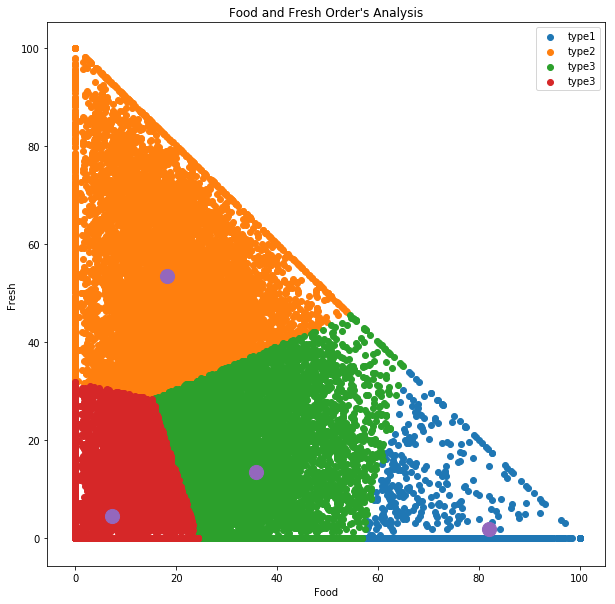

In [22]:
plt.figure(figsize=(10,10))
# 绘制样本散点图
plt.scatter(t2[kmeans.labels_ == 0].iloc[:, 0], t2[kmeans.labels_ == 0].iloc[:, 1], label="type1")
plt.scatter(t2[kmeans.labels_ == 1].iloc[:, 0], t2[kmeans.labels_ == 1].iloc[:, 1], label="type2")
plt.scatter(t2[kmeans.labels_ == 2].iloc[:, 0], t2[kmeans.labels_ == 2].iloc[:, 1], label="type3")
plt.scatter(t2[kmeans.labels_ == 3].iloc[:, 0], t2[kmeans.labels_ == 3].iloc[:, 1], label="type3")

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="o", s=200)
plt.title("Food and Fresh Order's Analysis")
plt.xlabel("Food")
plt.ylabel("Fresh")
plt.legend()
plt.show()

# 练习

In [24]:
ex = pd.read_csv("credit_card.csv")

In [59]:
ex.shape

(8950, 18)

In [26]:
ex.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
e1=ex.loc[:,"CREDIT_LIMIT":"PAYMENTS"]

In [40]:
e1.drop_duplicates(inplace=True)

In [60]:
e1.shape

(8762, 2)

In [55]:
e1.fillna(value=0,inplace=True)

In [61]:
e1.describe()

,CREDIT_LIMIT,PAYMENTS
count,8762.000000,8762.000000
mean,4517.590519,1770.330687
std,3659.961967,2914.688283
min,0.000000,0.000000
25%,1600.000000,408.785277
50%,3000.000000,881.396870
75%,6500.000000,1929.994463
max,30000.000000,50721.483360


In [62]:
e1.sample(5)

,CREDIT_LIMIT,PAYMENTS
8515,1000.0,684.858625
704,9500.0,2946.752322
8211,1200.0,182.363450
7161,2000.0,575.557594
6477,1200.0,457.956974


In [69]:
kmeans = KMeans(4,30)
kmeans.fit(e1)

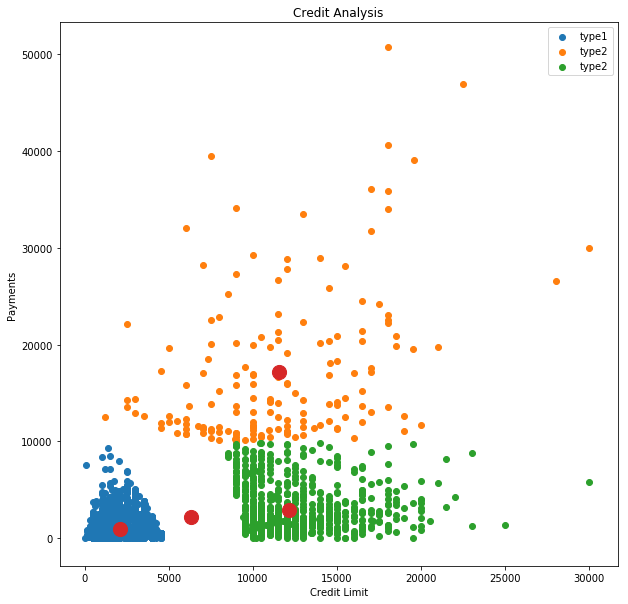

In [70]:
plt.figure(figsize=(10,10))
# 绘制样本散点图
plt.scatter(e1[kmeans.labels_ == 0].iloc[:, 0], e1[kmeans.labels_ == 0].iloc[:, 1], label="type1")
plt.scatter(e1[kmeans.labels_ == 1].iloc[:, 0], e1[kmeans.labels_ == 1].iloc[:, 1], label="type2")
plt.scatter(e1[kmeans.labels_ == 2].iloc[:, 0], e1[kmeans.labels_ == 2].iloc[:, 1], label="type2")


# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="o", s=200)
plt.title("Credit Analysis")
plt.xlabel("Credit Limit")
plt.ylabel("Payments")
plt.legend()
plt.show()